In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

## EDA

In [6]:
# Types of genres 
file_path = "../final_project/Data"
print(os.listdir(f'{file_path}/genres_original/'))

['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [7]:
music_blues = 'blues.00000.wav'
print('Playing : ', music_blues)
ipd.Audio('../final_project/Data/genres_original/blues/blues.00000.wav')

Playing :  blues.00000.wav


In [8]:
from pydub import AudioSegment

# Load the audio file
audio_file = AudioSegment.from_wav('../final_project/Data/genres_original/blues/blues.00000.wav')

# Print the duration of the audio file
print(f"Duration of the audio file: {audio_file.duration_seconds} seconds")


Duration of the audio file: 30.013333333333332 seconds


In [9]:
sound, sample_rate = librosa.load(f'{file_path}/genres_original/blues/blues.00000.wav')
print(sound[:5])
print(sample_rate)

[ 0.00732422  0.01660156  0.00762939 -0.00350952 -0.0022583 ]
22050


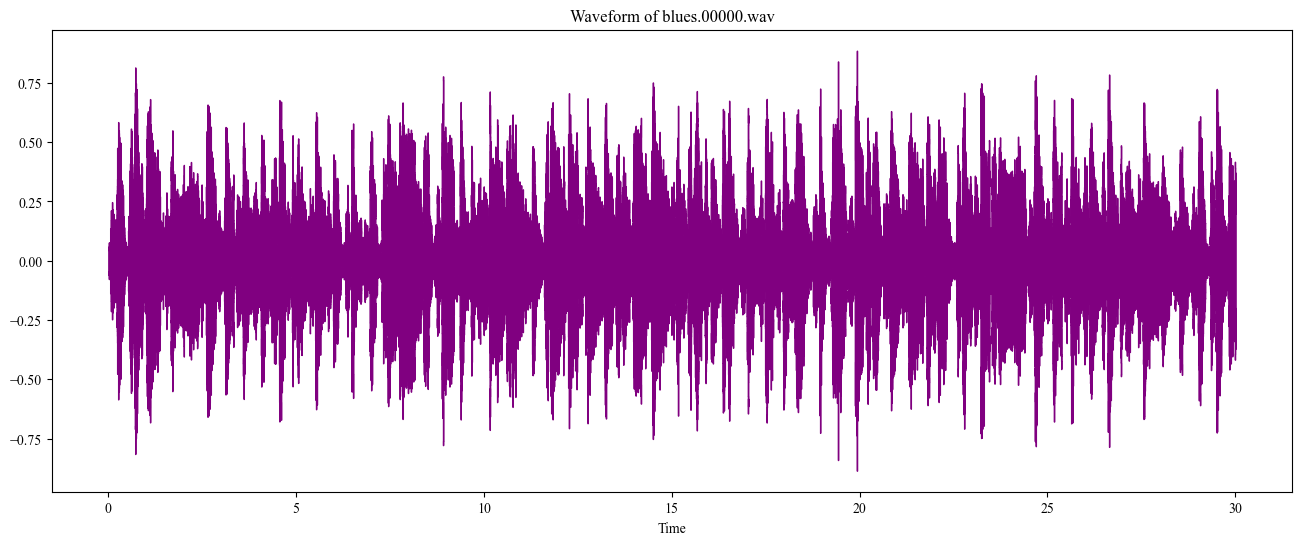

In [10]:
plt.rcParams['font.family'] = 'times new roman'
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=sample_rate, color="purple")
plt.title("Waveform of blues.00000.wav", fontsize=12)  
plt.show()

## Feature Extraction

In [11]:
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT) of blues.00000.wav
D = np.abs(librosa.stft(sound, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


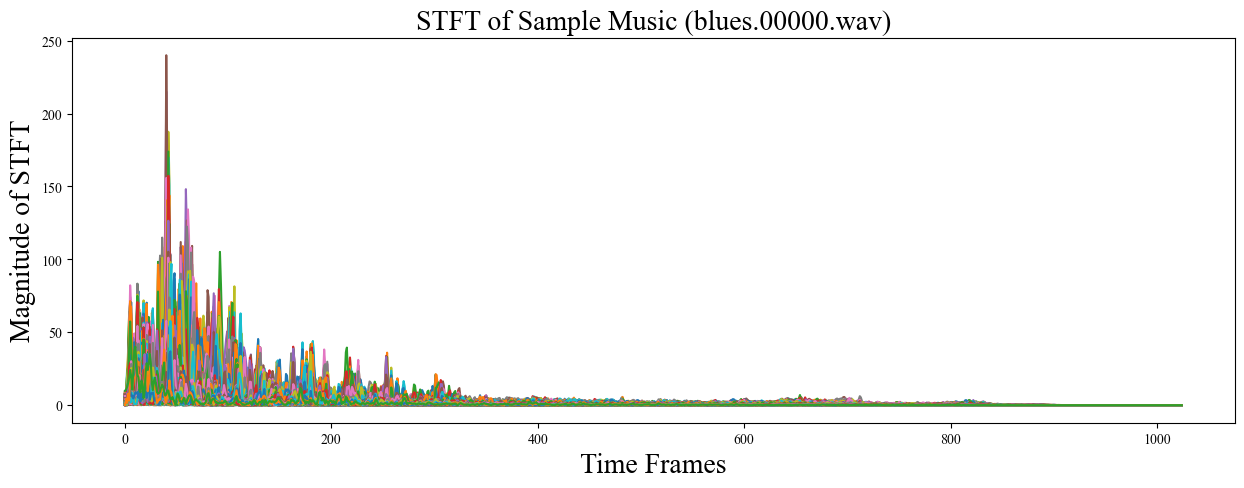

In [12]:
plt.figure(figsize = (15, 5))
plt.title('STFT of Sample Music (blues.00000.wav)', fontsize = 20)
plt.xlabel('Time Frames', fontsize = 20)
plt.ylabel('Magnitude of STFT', fontsize = 20)
plt.plot(D);

The STFT of the 'blues.0000.wav' file is predominantly positioned around the 0 to 300 timeframe.

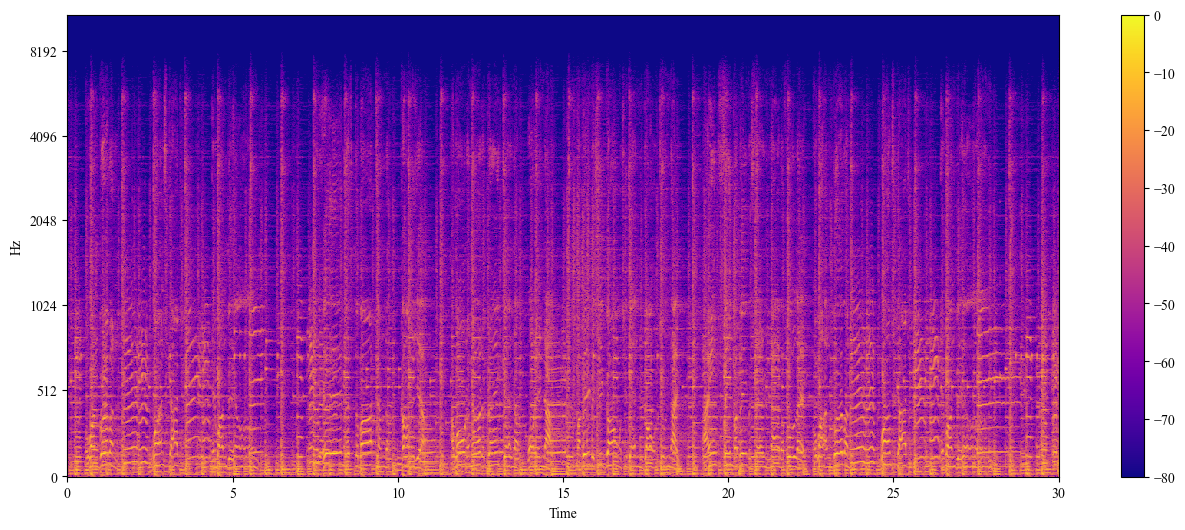

In [13]:
# Decibels of blues.00000.wav
db = librosa.amplitude_to_db(D, ref= np.max)

plt.figure(figsize = (16,6))
librosa.display.specshow(db, sr=sample_rate, hop_length= hop_length, x_axis='time', y_axis='mel', cmap='plasma')
plt.colorbar()

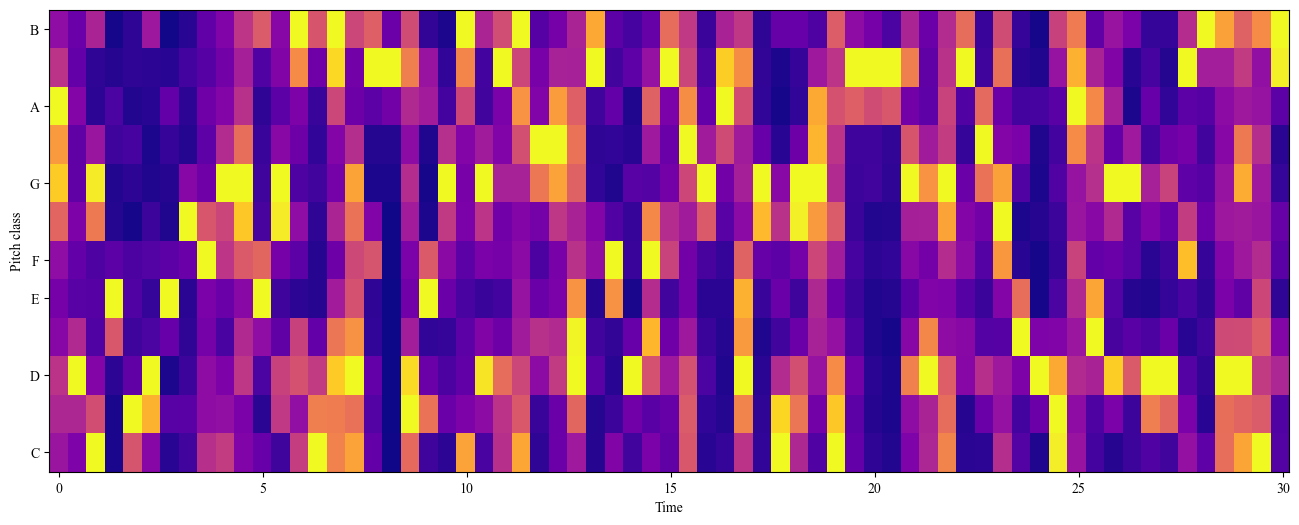

In [14]:
chromagram = librosa.feature.chroma_stft(y=sound, sr=sample_rate, hop_length=10000)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=10000, cmap='plasma')

## EDA on other data files

In [15]:
pd.set_option('display.max_columns', 60)
df = pd.read_csv(f'{file_path}/features_30_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
0              2002.449060            85882.761315   3805.839606   
1              2039.036516           213843.755497   3550.522098   
2              1747.702312            76254.192257   3042.260232   
3              1596.412872           166441.494769   2184.745799   
4              1748.172116            88445.209036   3579.757627   

    rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  9.015054e+05                 0.083045                0.000767   
1  2.977893e+06                 0.056040                0.001448   
2  7.840345e+05                 0.076291                0.001007   
3  1.493194e+06                 0.033309                0.000423   
4  1.572978e+06                 0.101461                0.001954   

   harmony_mean  harmony_var  perceptr_mean  perceptr_var       tempo  \
0 -4.529724e-05     0.008172       0.000008      0.005698  123.046875   
1  1.395807e-04     0.005099      -0.000178      0.003063   67.999589   
2  2.105576e-06     0.016342      -0.000019      0.007458  161.499023   
3  4.583644e-07     0.019054      -0.000014      0.002712   63.024009   
4 -1.756129e-05     0.004814      -0.000010      0.003094  135.999178   

   mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -113.570648  2564.207520  121.571793  295.913818  -19.168142  235.574432   
1 -207.501694  7764.555176  123.991264  560.259949    8.955127  572.810913   
2  -90.722595  3319.044922  140.446304  508.765045  -29.093889  411.781219   
3 -199.544205  5507.517090  150.090897  456.505402    5.662678  257.161163   
4 -160.337708  5195.291992  126.219635  853.784729  -35.587811  333.792938   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  mfcc6_mean   mfcc6_var  \
0   42.366421  151.106873   -6.364664  167.934799   18.623499   89.180840   
1   35.877647  264.506104    2.907320  279.932922   21.510466  156.477097   
2   31.684334  144.090317  -13.984504  155.493759   25.764742   74.548401   
3   26.859079  158.267303    1.771399  268.034393   14.234031  126.794128   
4   22.148071  193.456100  -32.478600  336.276825   10.852294  134.831573   

   mfcc7_mean   mfcc7_var  mfcc8_mean   mfcc8_var  mfcc9_mean   mfcc9_var  \
0  -13.704891   67.660492   15.343150   68.932579  -12.274110   82.204201   
1   -8.560436  200.849182   23.370686  142.555954  -10.099661  166.108521   
2  -13.664875  106.981827   11.639934  106.574875  -11.783643   65.447945   
3   -4.832006  155.912079    9.286494   81.273743   -0.759186   92.114090   
4  -23.352329   93.257095    0.498434  124.672127  -11.793437  130.073349   

   mfcc10_mean  mfcc10_var  mfcc11_mean  mfcc11_var  mfcc12_mean  mfcc12_var  \
0    10.976572   63.386311    -8.326573   61.773094     8.803792   51.244125   
1    11.900497  104.358612    -5.555639  105.173630     5.376327   96.197212   
2     9.718760   67.908859   -13.133803   57.781425     5.791199   64.480209   
3     8.137607   71.314079    -3.200653  110.236687     6.079319   48.251999   
4     1.207256   99.675575   -13.088418   80.254066    -2.813867   86.430626   

   mfcc13_mean  mfcc13_var  mfcc14_mean  mfcc14_var  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [17]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [18]:
# The first one being our example, blues.00000.wav

df.tempo[:5]

0    123.046875
1     67.999589
2    161.499023
3     63.024009
4    135.999178
Name: tempo, dtype: float64

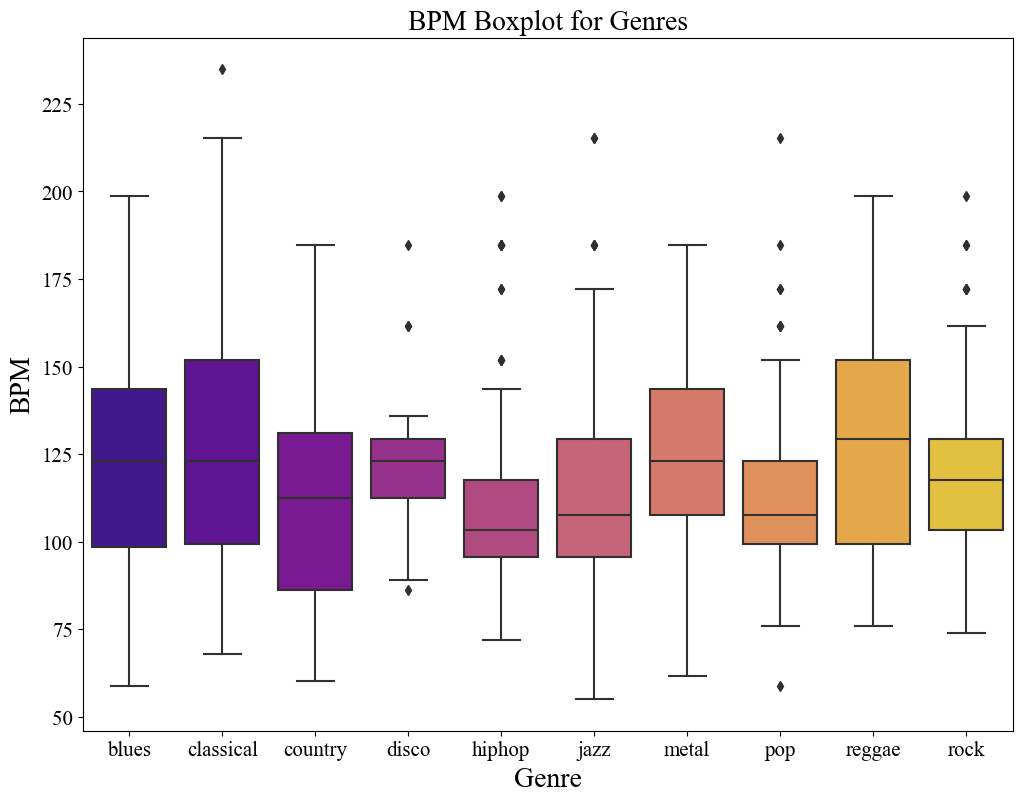

In [19]:
label_tempo_df= df[['label', 'tempo']]

f, ax = plt.subplots(figsize = (12,9))
sns.boxplot(x = 'label', y = 'tempo', data = label_tempo_df, palette = 'plasma')

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('BPM', fontsize = 20)
plt.show()

Based on the graph above we can see outliers for some genre like disco, hiphop, jazz, pop, and rock. 

In [20]:
# Checking out outliers

selected_rows_rock = df[(df['label'] == 'rock') & (df['tempo'] > 175)]
selected_rows_rock[['filename','label', 'tempo']]

filename label       tempo
921  rock.00021.wav  rock  184.570312
922  rock.00022.wav  rock  198.768029
985  rock.00085.wav  rock  184.570312

In [21]:
zero_crossings = librosa.zero_crossings(sound, pad = False)
sum(zero_crossings)

55031

In [23]:
tempo = librosa.beat.tempo(y= sound, sr = sample_rate)
print(tempo)

[123.046875]


## Model training 

#### Preprocessing 

In [24]:
from sklearn import preprocessing 

data = df.iloc[0:, 1:]
y = data['label']
X = data.drop('label', axis = 1)

cols = X.columns
scaler = preprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = cols)

#### PCA Extraction 

In [25]:
from sklearn.decomposition import PCA 

pca = PCA(n_components= 2)
df_pc = pd.DataFrame(data = pca.fit_transform(X), columns = ['principal component 1', 'principal component 2'])
df_final = pd.concat([df_pc, y], axis = 1)

print('variance ratio : ', pca.explained_variance_ratio_)
print('sum : ', sum(pca.explained_variance_ratio_))

variance ratio :  [0.23568344 0.1665449 ]
sum :  0.4022283384376525


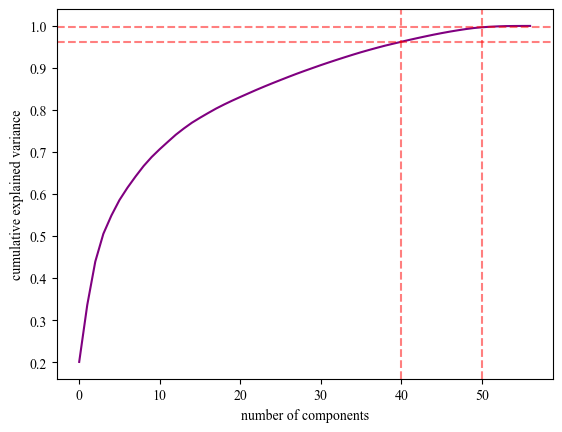

In [42]:
pca = PCA(whiten = True).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="purple")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Drawing vertical lines at components 40 and 51
for i in [40, 50]:
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5)
    # Drawing corresponding horizontal lines to the Y-axis
    y_value = cumulative_variance[i]
    plt.axhline(y=y_value, color='red', linestyle='--', alpha=0.5)

plt.show()

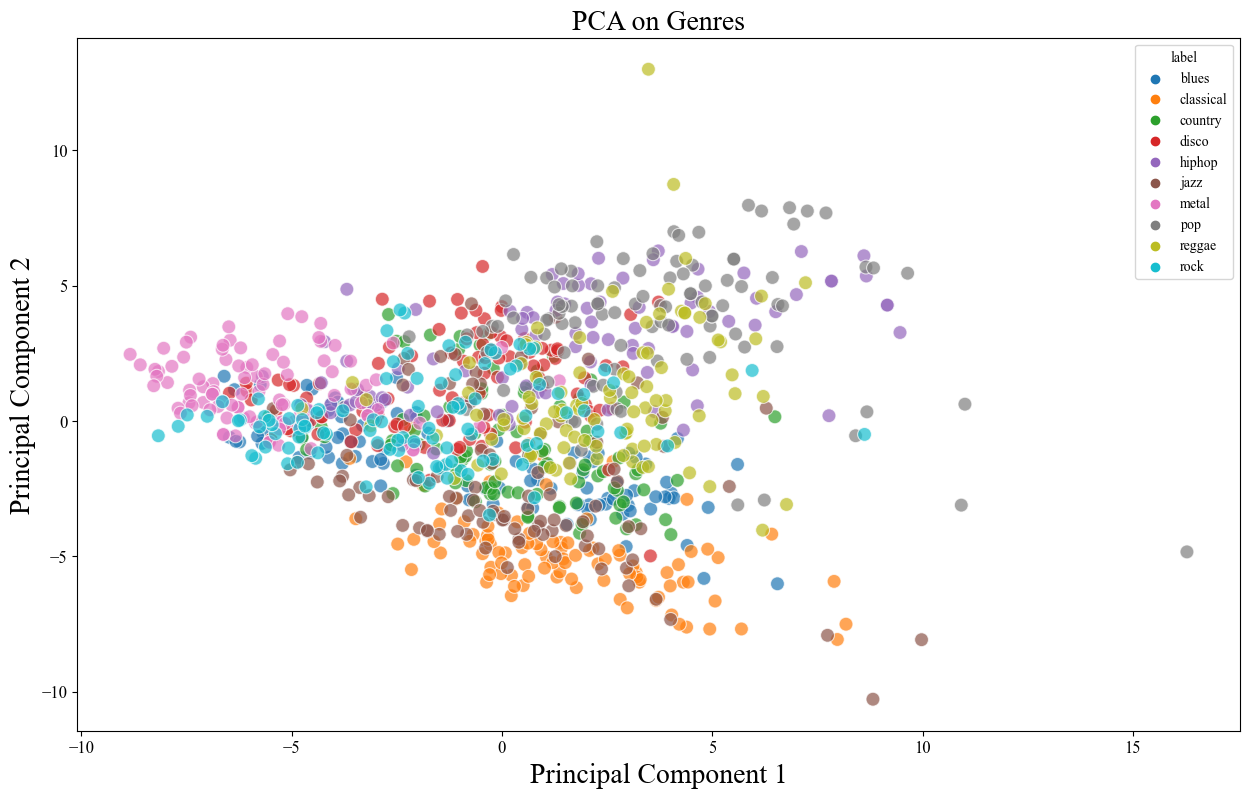

In [43]:
plt.figure(figsize = (15, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = df_final, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);
plt.xlabel("Principal Component 1", fontsize = 20)
plt.ylabel("Principal Component 2", fontsize = 20)
plt.savefig("PCA Scattert.pdf")

There's a significant overlap between many of the genres, suggesting common features across these genres. This could be due to similar instruments used, beats, rhythms, or other musical elements that PCA picked up on (principal component 1 range -5 to 5 and principal component 2 range -5 to 5).

Some genres, however, seem more distinct or have subclusters, indicating more variability within those genres or perhaps different substyles (parts of metal, classical, and pop).

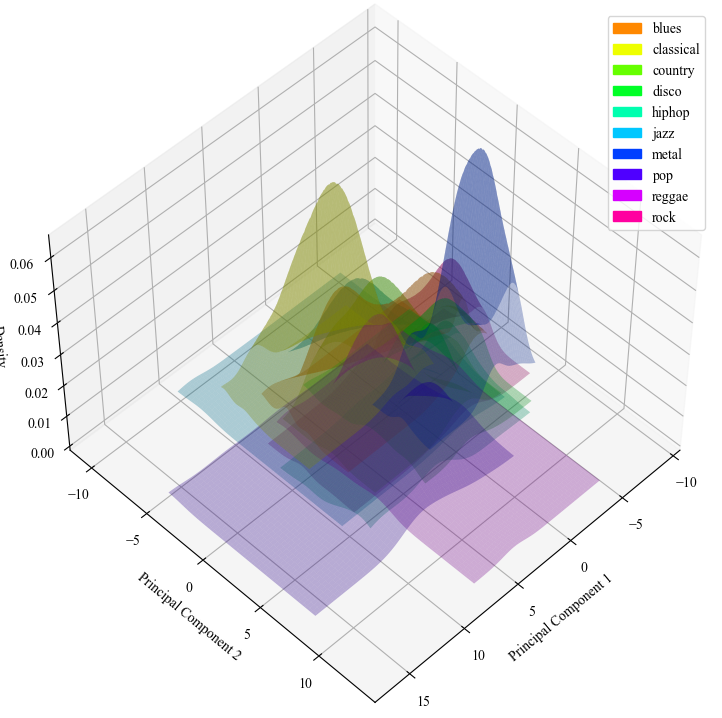

In [29]:
from scipy.stats import gaussian_kde
import matplotlib.patches as mpatches

# Generate a color palette with seaborn, and create a color map for the labels
palette = sns.color_palette("hsv", len(df_final['label'].unique()))
color_map = {label: color for label, color in zip(df_final['label'].unique(), palette)}

# Setting up the figure and 3D axis
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Getting the unique labels
labels = df_final['label'].unique()

# Plot KDE for each label
for i, label in enumerate(labels):
    # Extract the data for the current label
    subset = df_final[df_final['label'] == label]
    x = subset['principal component 1']
    y = subset['principal component 2']
    
    # Calculate the point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    
    # Create a grid to evaluate KDE
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    grid_coords = np.vstack([xx.ravel(), yy.ravel()])
    zz = gaussian_kde(xy)(grid_coords).reshape(xx.shape)
    
    # Plotting the density
    ax.plot_surface(xx, yy, zz, color=color_map[label], alpha=0.3, edgecolor='none')

# Create proxy artists for the legend
proxy_artists = [mpatches.Patch(color=color_map[label], label=label) for label in labels]

# Add the legend
ax.legend(handles=proxy_artists)

# Adjust the view angle for a more aerial perspective
ax.view_init(elev=50, azim=45)  # Elevate to 60 degrees for a more top-down view

# Setting the labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Density')

# Show the plot
plt.show()

#### Model training

In [30]:
data = pd.read_csv('../final_project/Data/features_3_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
0              1972.744388           117335.771563   3714.560359   
1              2010.051501            65671.875673   3869.682242   
2              2084.565132            75124.921716   3997.639160   
3              1960.039988            82913.639269   3568.300218   
4              1948.503884            60204.020268   3469.992864   

    rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  1.080790e+06                 0.081851                0.000558   
1  6.722448e+05                 0.087173                0.001030   
2  7.907127e+05                 0.071383                0.000425   
3  9.216524e+05                 0.069426                0.000304   
4  6.102111e+05                 0.070095                0.000289   

   harmony_mean  harmony_var  perceptr_mean  perceptr_var       tempo  \
0     -0.000078     0.008354      -0.000068      0.005535  129.199219   
1     -0.000099     0.004950      -0.000103      0.004854  123.046875   
2     -0.000066     0.012476       0.000065      0.004357  123.046875   
3     -0.000014     0.008318       0.000018      0.005927  123.046875   
4      0.000041     0.009634      -0.000106      0.005833  123.046875   

   mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -118.627914  2440.286621  125.083626  260.956909  -23.443724  364.081726   
1 -125.590706  2038.344238  122.421227  216.774185  -20.718019  231.979767   
2 -132.441940  3798.532227  115.085175  257.321289  -14.811666  192.448074   
3 -118.231087  2508.781006  132.116501  332.650574  -18.758335  109.357529   
4 -105.968376  2118.919922  134.643646  219.562622  -19.961748  171.878754   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  mfcc6_mean   mfcc6_var  \
0   41.321484  181.694855   -5.976108  152.963135   20.115141   75.652298   
1   50.128387  142.700409  -11.333302  139.243118   21.385401   77.817947   
2   50.189293  144.166031   -0.680819  128.376892   24.650375   66.371170   
3   39.769306  184.693344  -13.260426  144.398224   20.468134  122.516464   
4   40.171753  103.120712  -14.271939  102.651230   18.734617   79.070000   

   mfcc7_mean  mfcc7_var  mfcc8_mean  mfcc8_var  mfcc9_mean   mfcc9_var  \
0  -16.045410  40.227104   17.855198  84.320282  -14.633434   83.437233   
1  -15.960796  97.364029   19.454103  57.948093  -12.465918   68.271523   
2  -13.506104  89.319336   15.643386  55.253967  -13.216637  120.308784   
3  -14.563448  68.937332   18.745104  74.748886  -13.755463   73.868576   
4  -15.619381  48.510284   19.207966  53.642956  -18.274683   95.300995   

   mfcc10_mean  mfcc10_var  mfcc11_mean  mfcc11_var  mfcc12_mean  mfcc12_var  \
0    10.270527   97.001335    -9.708279   66.669891    10.183875   45.103611   
1    17.898169   56.222176   -11.732554   54.373909     8.145000   40.662876   
2    10.406025   35.757862    -7.991465   47.911613    11.853963   36.569931   
3    12.993759   41.549564   -12.648887   58.540478    10.389314   39.102024   
4    14.316693   58.821163    -5.792194   55.030254    17.045437   43.229939   

   mfcc13_mean  mfcc13_var  mfcc14_mean  mfcc14_var  mf

In [31]:
df = data.iloc[0:, 2:]
y = df.label.values
X = df.drop('label', axis = 1)
X_columns = X.columns
scaler = preprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X_columns).values

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Building the model 
def model_build(model, kf, title = "Default"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    print("Accuracy score of", title, "is:", round(np.mean(accuracy_scores), 5))

    # Let's see the confusion matrix of the last split for a little insight
    con_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(con_mat, cmap="plasma", annot=True, 
                xticklabels = ["blues", "classical", "country", "disco", 
                               "hiphop", "jazz", "metal", "pop", "reggae", "rock"], 
                yticklabels=["blues", "classical", "country", "disco", "hiphop", 
                             "jazz", "metal", "pop", "reggae", "rock"])
    
    # Find the indices of the top three maximum values in the confusion matrix
    max_indices = np.argpartition(-con_mat, 3, axis=None)[:3]

    # Highlight the cells with the top three maximum values by changing their color
    for idx in max_indices:
        row, col = np.unravel_index(idx, con_mat.shape)
        plt.gca().add_patch(plt.Rectangle((col + 0.03, row + 0.03), 0.93, 0.93, fill=False, edgecolor='red', lw=5))

    # Add labels for the axes
    plt.xlabel('Actual Genres (test)')
    plt.ylabel('Predicted Genres (predict)')
    
    plt.show()

#### Training Method 1 - Random Forest Classifier

In [33]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

##### Random Forest Classifier Hyperparameter tuning

Performing hyperparameter tuning to find the optinmal number of estimators, depth, and random state. Hyperparameter do not necessarily improves the accuracy of the model, but balances between the accuracy, efficiency(runtime), and overfitting.

In [37]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 500, 1000],  # List of trees to try
    'max_depth': [None, 10, 20]  # Depths to try including None (no limit)
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit grid search to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...................max_depth=None, n_estimators=200; total time=   5.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   5.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=   5.4s
[CV] END ...................max_depth=None, n_estimators=500; total time=  13.6s
[CV] END ...................max_depth=None, n_estimators=500; total time=  13.7s
[CV] END ...................max_depth=None, n_estimators=500; total time=  13.6s
[CV] END ..................max_depth=None, n_estimators=1000; total time=  27.5s
[CV] END ..................max_depth=None, n_estimators=1000; total time=  27.0s
[CV] END ..................max_depth=None, n_estimators=1000; total time=  27.0s
[CV] END .....................max_depth=10, n_estimators=200; total time=   4.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=   4.6s
[CV] END .....................max_depth=10, n_est

For random forest classifier, we will use no max depth, 1000 for estimators, and 10 for random state for proper model comparison.

Accuracy score of Random Forest Classifier is: 0.88128


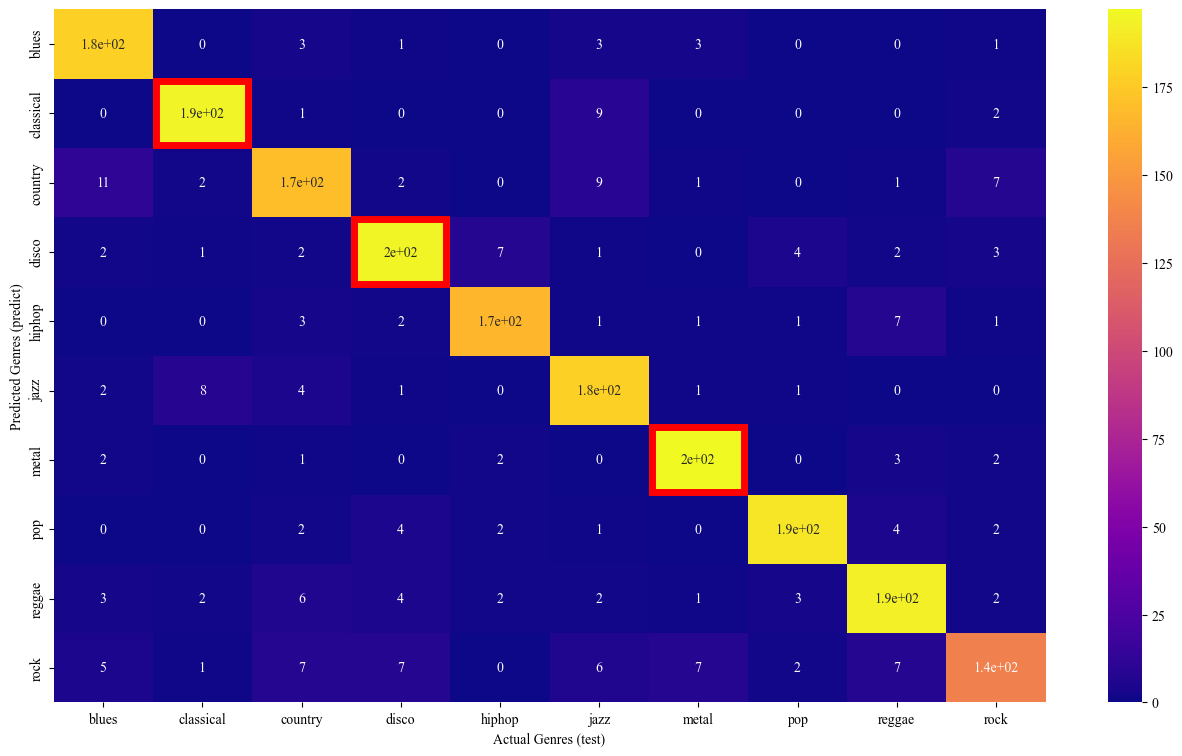

In [54]:
# Random Forest Classifier 
split = KFold(n_splits = 5, shuffle = True)
rfc = RandomForestClassifier(n_estimators = 1000, max_depth = None, random_state = 10)
model_build(rfc, split, 'Random Forest Classifier')


The result varies over iteration, but we can see random forest classier performs especially better in recognizing classical music.

#### Training Method 2 - KNN

Accuracy score of K Nearest Neighbor is: 0.86006


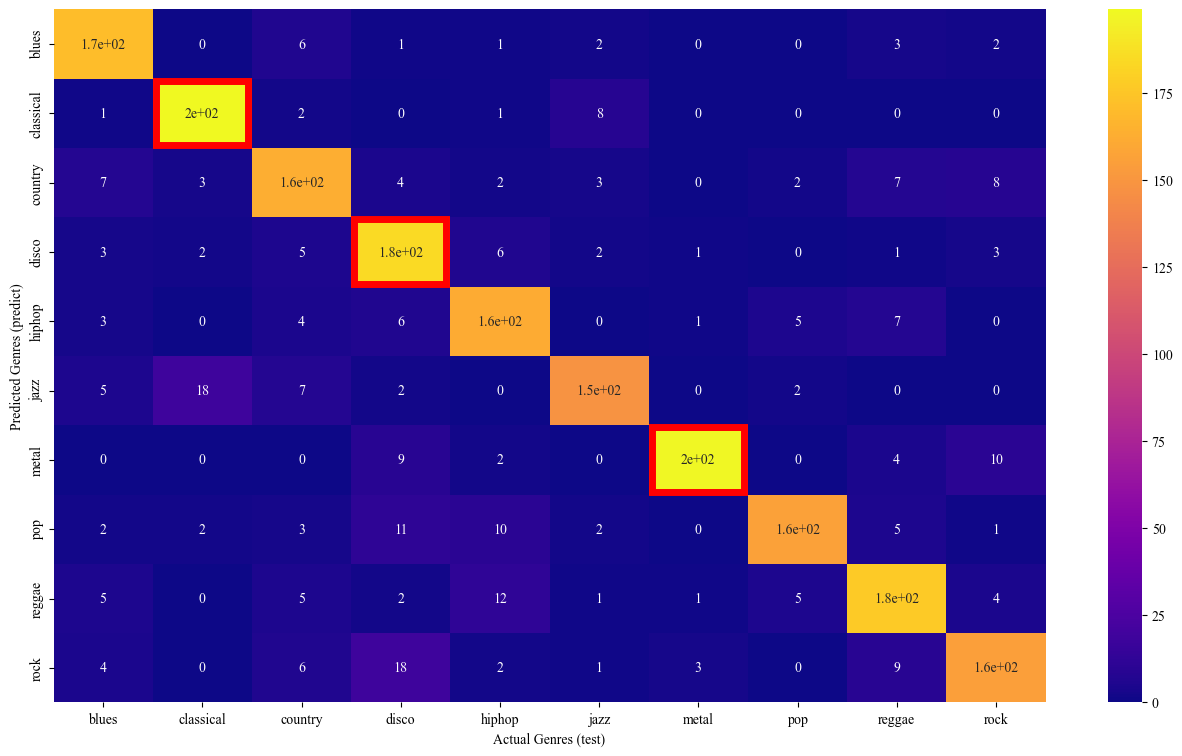

In [53]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# There are 10 music genres
knn = KNeighborsClassifier(n_neighbors = 10)
model_build(knn, split, 'K Nearest Neighbor')

For KNN, the model is good at classifying classical and metal music. Considering the PCA analysis graph above about the distinctiveness of classical and metal music, these results show a pattern that conforms to such analysis.

#### Training Method 3 - Support vector classification 

Accuracy score of Support Vector Classification is: 0.85946


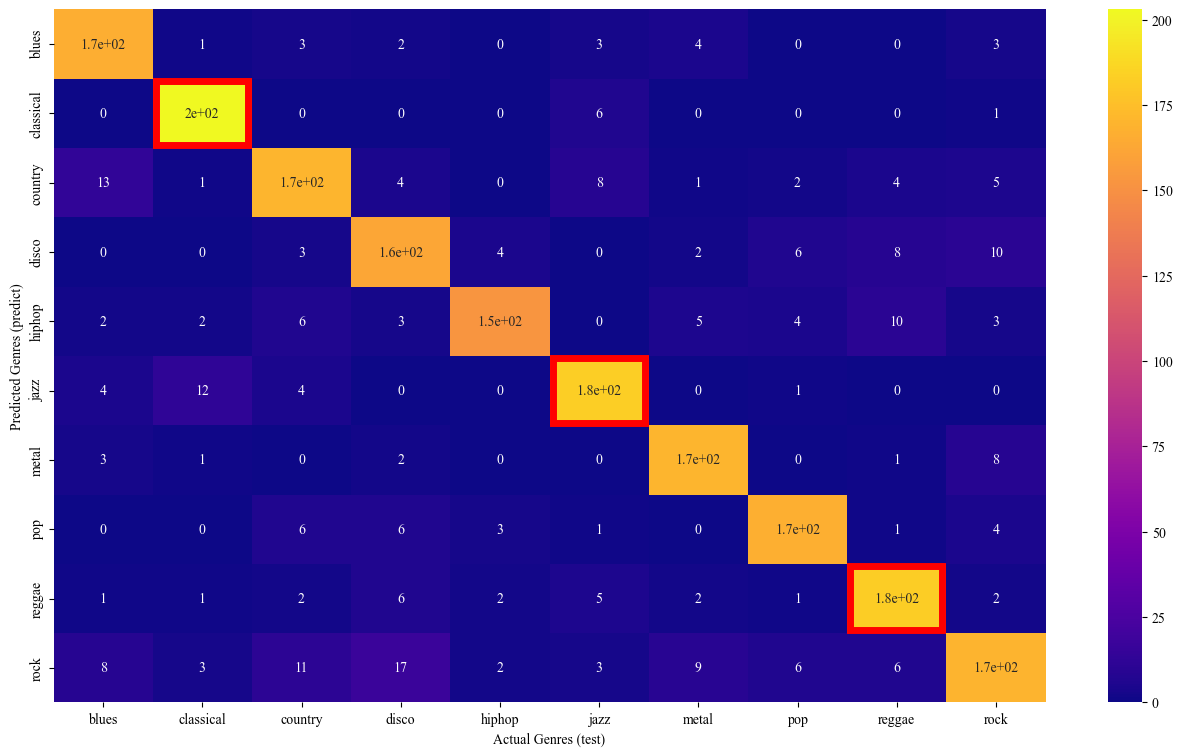

In [55]:
# Support vector classification 
from sklearn.svm import SVC

# ovo: one-vs-one decision funcion 
# used  as a multi-class strategy to train models.
svc = SVC(decision_function_shape = 'ovo')
model_build(svc, split, 'Support Vector Classification')

In support vector classification, the model is good at classifying classical, metal, and jazz music. However, the difference is not significant compared to its ability to recognize other genres. It is particularly noteworthy that the model recognizes jazz music well, especially considering that the PCA analysis showed that jazz had the most data points clustered together with other genres, which will be much more difficult to recognize in insight.

#### Training Method 4 - XG Boost

Accuracy score of XG Boost is: 0.9019


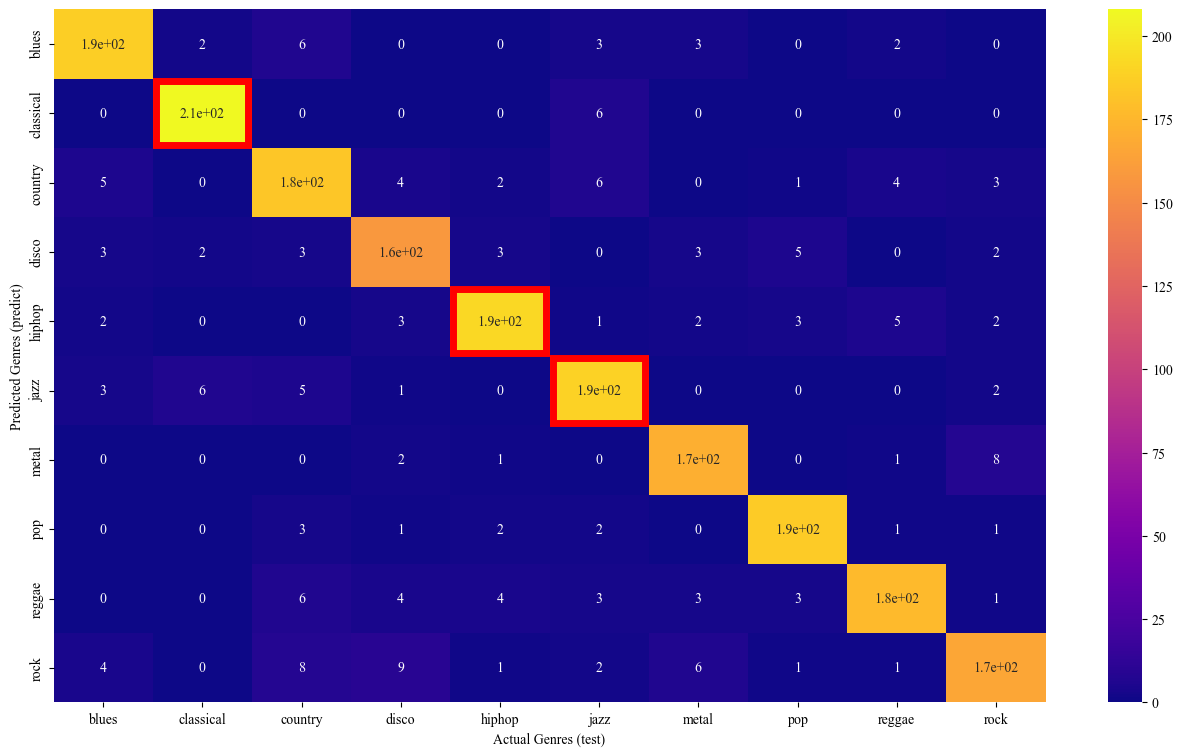

In [51]:
# XG Boost 
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier

def model_build_xgb(model, kf, title = "Default"):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        y_pred_labels = label_encoder.inverse_transform(y_pred)

    print("Accuracy score of", title, "is:", round(np.mean(accuracy_scores), 5))
    # Let's see the confusion matrix of the last split for a little insight
    con_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(con_mat, cmap="plasma", annot=True, 
                xticklabels = ["blues", "classical", "country", "disco", 
                               "hiphop", "jazz", "metal", "pop", "reggae", "rock"], 
                yticklabels=["blues", "classical", "country", "disco", "hiphop", 
                             "jazz", "metal", "pop", "reggae", "rock"])
    
    # Find the indices of the top three maximum values in the confusion matrix
    max_indices = np.argpartition(-con_mat, 3, axis=None)[:3]

    # Highlight the cells with the top three maximum values by changing their color
    for idx in max_indices:
        row, col = np.unravel_index(idx, con_mat.shape)
        plt.gca().add_patch(plt.Rectangle((col + 0.03, row + 0.03), 0.93, 0.93, fill=False, edgecolor='red', lw=5))

    # Add labels for the axes
    plt.xlabel('Actual Genres (test)')
    plt.ylabel('Predicted Genres (predict)')
    
    plt.show()

# Leave 2 blank spaces after a function definition
xgb = XGBClassifier()
model_build_xgb(xgb, split, 'XG Boost')

The XGBoost method performed well on the exact three genres that showed distinct distribution, as compared to other genres in the PCA analysis (classical, metal, and pop). However, the model exhibited even performance across various genres, indicating overall good and highest performance.

##### XG Boost Hyperparameter tuning

In [41]:
# Searching for the best number of extimators and learning rate for XG Boost

from sklearn.model_selection import train_test_split 

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],  # Adjust values as needed
    'learning_rate': [0.05, 0.1, 0.2]  # Adjust values as needed
}

# Create a basic XGBClassifier model
model = XGBClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   3.5s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   3.2s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   3.3s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=  11.7s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=  11.8s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=  11.1s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  17.9s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  17.9s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  17.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.9s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.9s
[CV] END ................learning_rate=0.1, n_est

Found the hyperparameter for XG Boost, eventually applying 500 for estimators, 0.1 for learning rate.

In [47]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = XGBClassifier(n_estimators=500, learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
y_pred = model.predict(X_test)
print('Accuracy :', round(accuracy_score(y_test, y_pred), 5))

Accuracy : 0.90873


In [49]:
# Model inspection technique that can be used for any fitted estimator
# This is especially useful for non-linear or opaque estimators. 
from sklearn.inspection import permutation_importance

# Ensure 'model' is your fitted estimator and X_test, y_test are your testing data and labels
perm = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=1)

# perm will have the importances in perm.importances_mean and others
print(perm.importances_mean)


[ 3.43207900e-02  9.62103016e-03  6.65866026e-03  2.02562050e-02
  1.61462503e-03  1.20096077e-04  1.62129704e-02  3.48278623e-03
  3.05577796e-03  3.70963437e-03  5.48438751e-03  1.30771284e-03
  3.50413664e-02  2.70216173e-02  4.86255671e-02  1.09007206e-01
  1.74939952e-02  7.07232453e-03  1.08486789e-02  4.80384307e-03
 -3.73632239e-04  2.02028289e-02  9.66106218e-03  3.85908727e-02
  3.57619429e-03  7.64611689e-03  3.93648252e-03  2.44862557e-02
  3.42941019e-03  1.88017080e-02  5.08406725e-03  1.16359754e-02
  2.53536162e-03  2.50333600e-02  1.04083267e-03  6.85882039e-03
  6.40512410e-04  1.85081398e-02  8.00640512e-04  7.11235655e-03
 -9.34080598e-05  9.56765412e-03  1.49452896e-03  7.61942888e-03
  1.33440085e-03  1.66800107e-03  7.87296504e-04  7.32586069e-03
  1.73472111e-04  7.75286896e-03  4.27008273e-04  5.57779557e-03
  2.05497732e-03  1.33440085e-03  9.87456632e-04  2.69548973e-03
  2.81558580e-03]


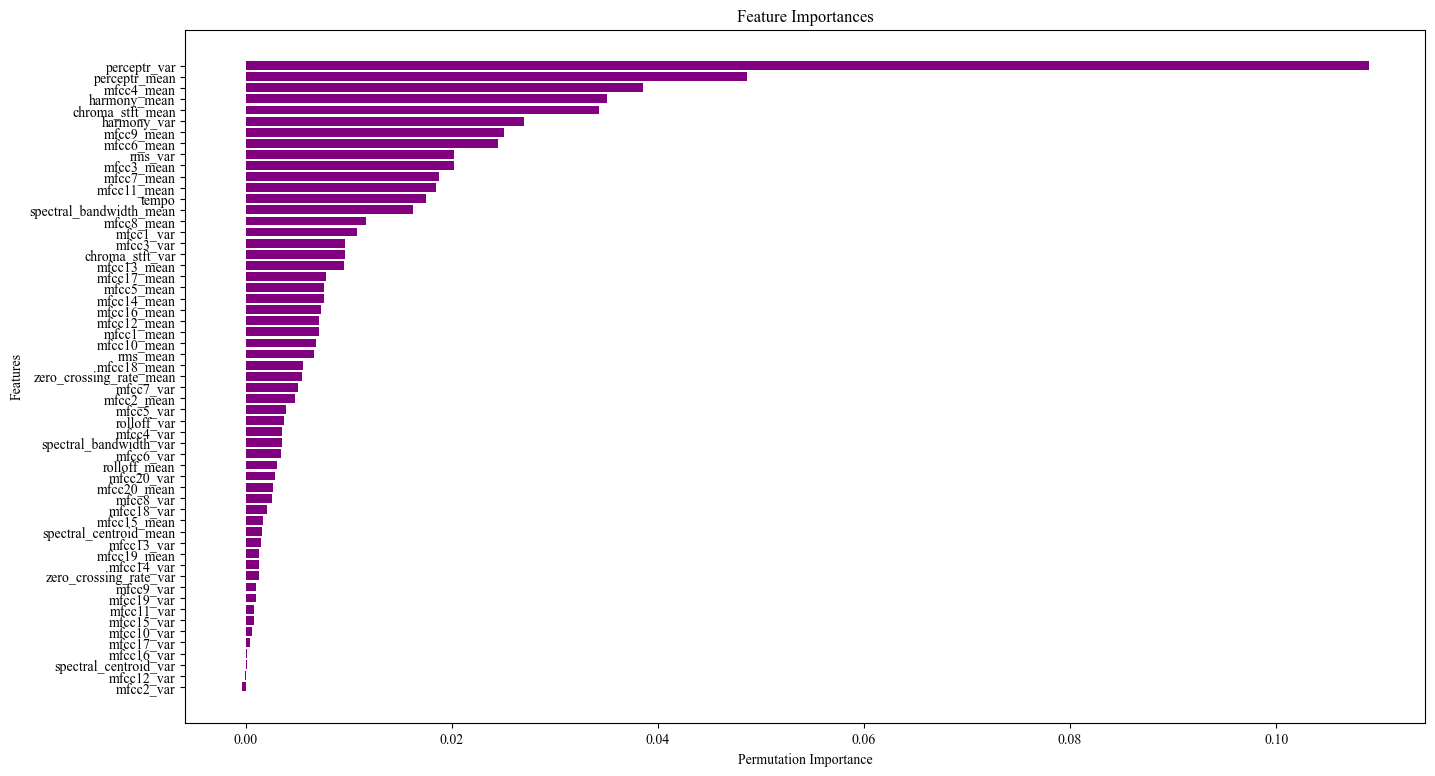

In [50]:
# Assuming 'columns' is a list of feature names and 'perm' is the result from permutation_importance
columns = np.array(df.drop('label', axis=1).columns)

# Sort the indices of the features based on their importance
sorted_idx = perm.importances_mean.argsort()

# Plotting
plt.figure(figsize = (16, 9))
plt.barh(columns[sorted_idx], perm.importances_mean[sorted_idx], color = 'purple')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

The most important features seem to be some form of perceptual variance and mean, which suggests that the way the model perceives variation and central tendency in the audio features is critical for making accurate classifications.

Also, the MFCC features, known to be good at capturing timbral aspects of sound, also show varying levels of importance. This is typical in music genre classification, as timbre is a distinguishing factor in music.

Features like "harmony_mean" and "tempo" have significant importance but less so compared to the top features.

Lastly, the presence of both mean and variance for many features indicates that the model benefits from understanding both the central tendency and the spread of the data.

## Make Music recommendation

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
import pandas as pd

# Read the dataset
file_path = "../final_project/Data"
full_data = pd.read_csv(f'{file_path}/features_30_sec.csv')

# Separate filenames and labels
filenames = full_data['filename']
labels = full_data['label']

# Drop non-numeric columns (filename, length, label) before scaling
data_to_scale = full_data.drop(columns=['filename', 'length', 'label'])

# Scale the data
data_scaled = preprocessing.scale(data_to_scale)
print('Scaled data type:', type(data_scaled))

# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert similarity into a DataFrame with song names as indices and columns
sim_df = pd.DataFrame(similarity, index=filenames, columns=filenames)
sim_df.head()

def recommender(song_name, data, n_recommendations=5):
    # Extract the top N similar songs
    top_n = data[song_name].sort_values(ascending=False)[1:n_recommendations+1]

    # Genre to path mapping
    # genre_path_map = {
    #     "blues": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues",
    #     "classical": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical",
    #     "country": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/country", 
    #     "disco": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco", 
    #     "hiphop": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop", 
    #     "jazz": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz", 
    #     "metal": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal", 
    #     "pop": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop", 
    #     "reggae": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae", 
    #     "rock": "../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock"
    # }

    # recommendations = []
    # for song in top_n.index:
    #     genre = song.split('.')[0]
    #     path = genre_path_map.get(genre, "Unknown Genre") + '/' + song
    #     recommendations.append(path)

    recommendations = top_n.index.tolist()

    return recommendations

# Example usage
now_playing = 'hiphop.00010.wav'
recommended_songs = recommender(now_playing, sim_df)
for i, song in enumerate(recommended_songs, 1):
    print(f'{i-1:<2} {song}')

Scaled data type: <class 'numpy.ndarray'>
Similarity shape: (1000, 1000)
0  hiphop.00017.wav
1  hiphop.00023.wav
2  blues.00077.wav
3  country.00075.wav
4  blues.00078.wav
